In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

import seaborn as sns


In [2]:
df=pd.read_csv("dataSets/titanic.csv")
del df["PassengerId"]
del df["Name"]
del df["Ticket"]
del df["Cabin"]
df['Sex']=df['Sex'].replace(to_replace='male',value='1')
df['Sex']=df['Sex'].replace(to_replace='female',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='S',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='C',value='1')
df['Embarked']=df['Embarked'].replace(to_replace='Q',value='2')
df=df.dropna()
df.shape


(712, 8)

In [126]:
df0=df[df.Survived==0]
df1=df[df.Survived==1]


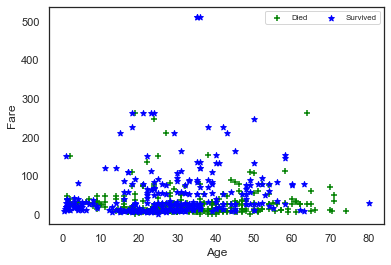

In [127]:
plt.xlabel('Age')
plt.ylabel ('Fare')
died=plt.scatter(df0['Age'],df0['Fare'], color='green', marker='+')
survived=plt.scatter(df1['Age'],df1['Fare'], color='blue', marker='*')
plt.legend((died, survived),
           ('Died', 'Survived'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)


In [3]:
y=df['Survived']
X=df.drop(['Survived'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [129]:
model=SVC()
grid_values={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],
            "C":[.5,1,1.5]}
grid = GridSearchCV(model, grid_values, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'C': 0.5, 'kernel': 'linear'}


In [119]:
kernals=['linear', 'poly', 'rbf', 'sigmoid']
C=[.5,1,1.5]
result=[]

for each in kernals:
    for ea in C:
        model=SVC(C=ea, kernel=each)
        model.fit(X_train,y_train)
        y_predicted_test = model.predict(X_test)
        y_predicted_train=model.predict(X_train)
        train_score=model.score(X_train,y_train)
        test_score=model.score(X_test,y_test)
        f1_train=f1_score(y_train,y_predicted_train)
        f1_test=f1_score(y_test,y_predicted_test)
        temp=[each, ea, round(train_score,3),round(test_score,3),round(f1_train,3),round(f1_test,3)]
        result.append(temp)
df_results=pd.DataFrame(result,columns=["Kernal Type", "C", "Train Data Score", "Test Data Score", "Train f-score", "Test f-score"])
df_results  

,Kernal Type,C,Train Data Score,Test Data Score,Train f-score,Test f-score
0,linear,0.5,0.787,0.758,0.716,0.703
1,linear,1.0,0.787,0.758,0.716,0.703
2,linear,1.5,0.787,0.758,0.716,0.703
3,poly,0.5,0.640,0.618,0.256,0.244
4,poly,1.0,0.646,0.635,0.276,0.301
5,poly,1.5,0.646,0.629,0.265,0.267
6,rbf,0.5,0.674,0.663,0.463,0.474
7,rbf,1.0,0.680,0.663,0.480,0.474
8,rbf,1.5,0.685,0.663,0.503,0.483
9,sigmoid,0.5,0.579,0.528,0.447,0.373


In [130]:
survived_male=df[(df.Survived==1) & (df.Sex =='1')]
died_male=df[(df.Survived==0) & (df.Sex =='1')]
survived_female=df[(df.Survived==1) & (df.Sex =='0')]
died_female=df[(df.Survived==0) & (df.Sex =='0')]

sex_df=pd.DataFrame({'Sex':['Male','Female'],
                          'Survived':[survived_male.shape[0],survived_female.shape[0]],
                          'Died':[died_male.shape[0],died_female.shape[0]]})


<AxesSubplot:xlabel='Sex'>

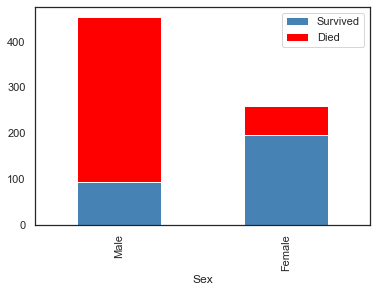

In [131]:
import seaborn as sns
sns.set(style='white')
sex_df.set_index('Sex').plot(kind='bar', stacked=True, color=['steelblue', 'red'])     

<AxesSubplot:xlabel='Class'>

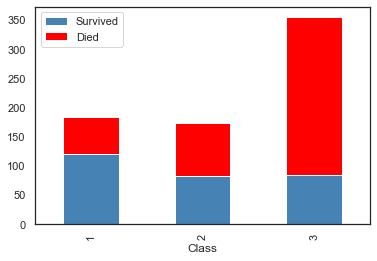

In [132]:
survived_first=df[(df.Survived==1) & (df.Pclass ==1)]
died_first=df[(df.Survived==0) & (df.Pclass ==1)]
survived_second=df[(df.Survived==1) & (df.Pclass ==2)]
died_second=df[(df.Survived==0) & (df.Pclass ==2)]
survived_third=df[(df.Survived==1) & (df.Pclass ==3)]
died_third=df[(df.Survived==0) & (df.Pclass ==3)]
class_df=pd.DataFrame({'Class':[1,2,3],
                        'Survived':[survived_first.shape[0],survived_second.shape[0],survived_third.shape[0]],
                        'Died':[died_first.shape[0],died_second.shape[0],died_third.shape[0]]})
class_df.set_index('Class').plot(kind='bar', stacked=True, color=['steelblue', 'red']) 

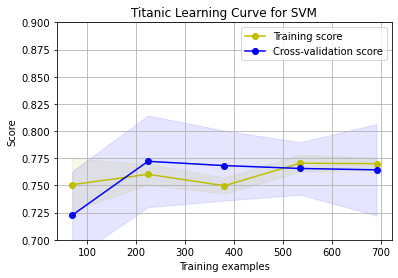

In [8]:
model=SVC(C=.5, kernel='linear')
title="Titanic Learning Curve for SVM"
trainingSizes,trainingScores,testingScores = learning_curve(model,X,y,random_state = 3,cv = 10)
plt.figure()
plt.title(title)
ylim = (0.7, .9)
if ylim is not None:
    plt.ylim(*ylim)
        
plt.xlabel("Training examples")
plt.ylabel("Score")
    
trainingScores_std = np.std(trainingScores, axis=1)
trainingScores_mean = np.mean(trainingScores, axis=1)
testingScores_mean = np.mean(testingScores, axis=1)
testingScores_std = np.std(testingScores, axis=1)
plt.grid()

plt.fill_between(trainingSizes, trainingScores_mean - trainingScores_std,
                trainingScores_mean + trainingScores_std, alpha=0.1,
                color="y")
plt.fill_between(trainingSizes, testingScores_mean - testingScores_std,
                testingScores_mean + testingScores_std, alpha=0.1, color="b")
plt.plot(trainingSizes, trainingScores_mean, 'o-', color="y",
        label="Training score")
plt.plot(trainingSizes, testingScores_mean, 'o-', color="b",
        label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
#diabetes data

In [5]:
df=pd.read_csv("dataSets/diabetes.csv")
zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_to_nan:
             df[col]=df[col].replace(0,np.NaN)
             mean=int(df[col].mean(skipna=True))
             df[col]=df[col].replace(np.NaN,mean)
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  #same as DT
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


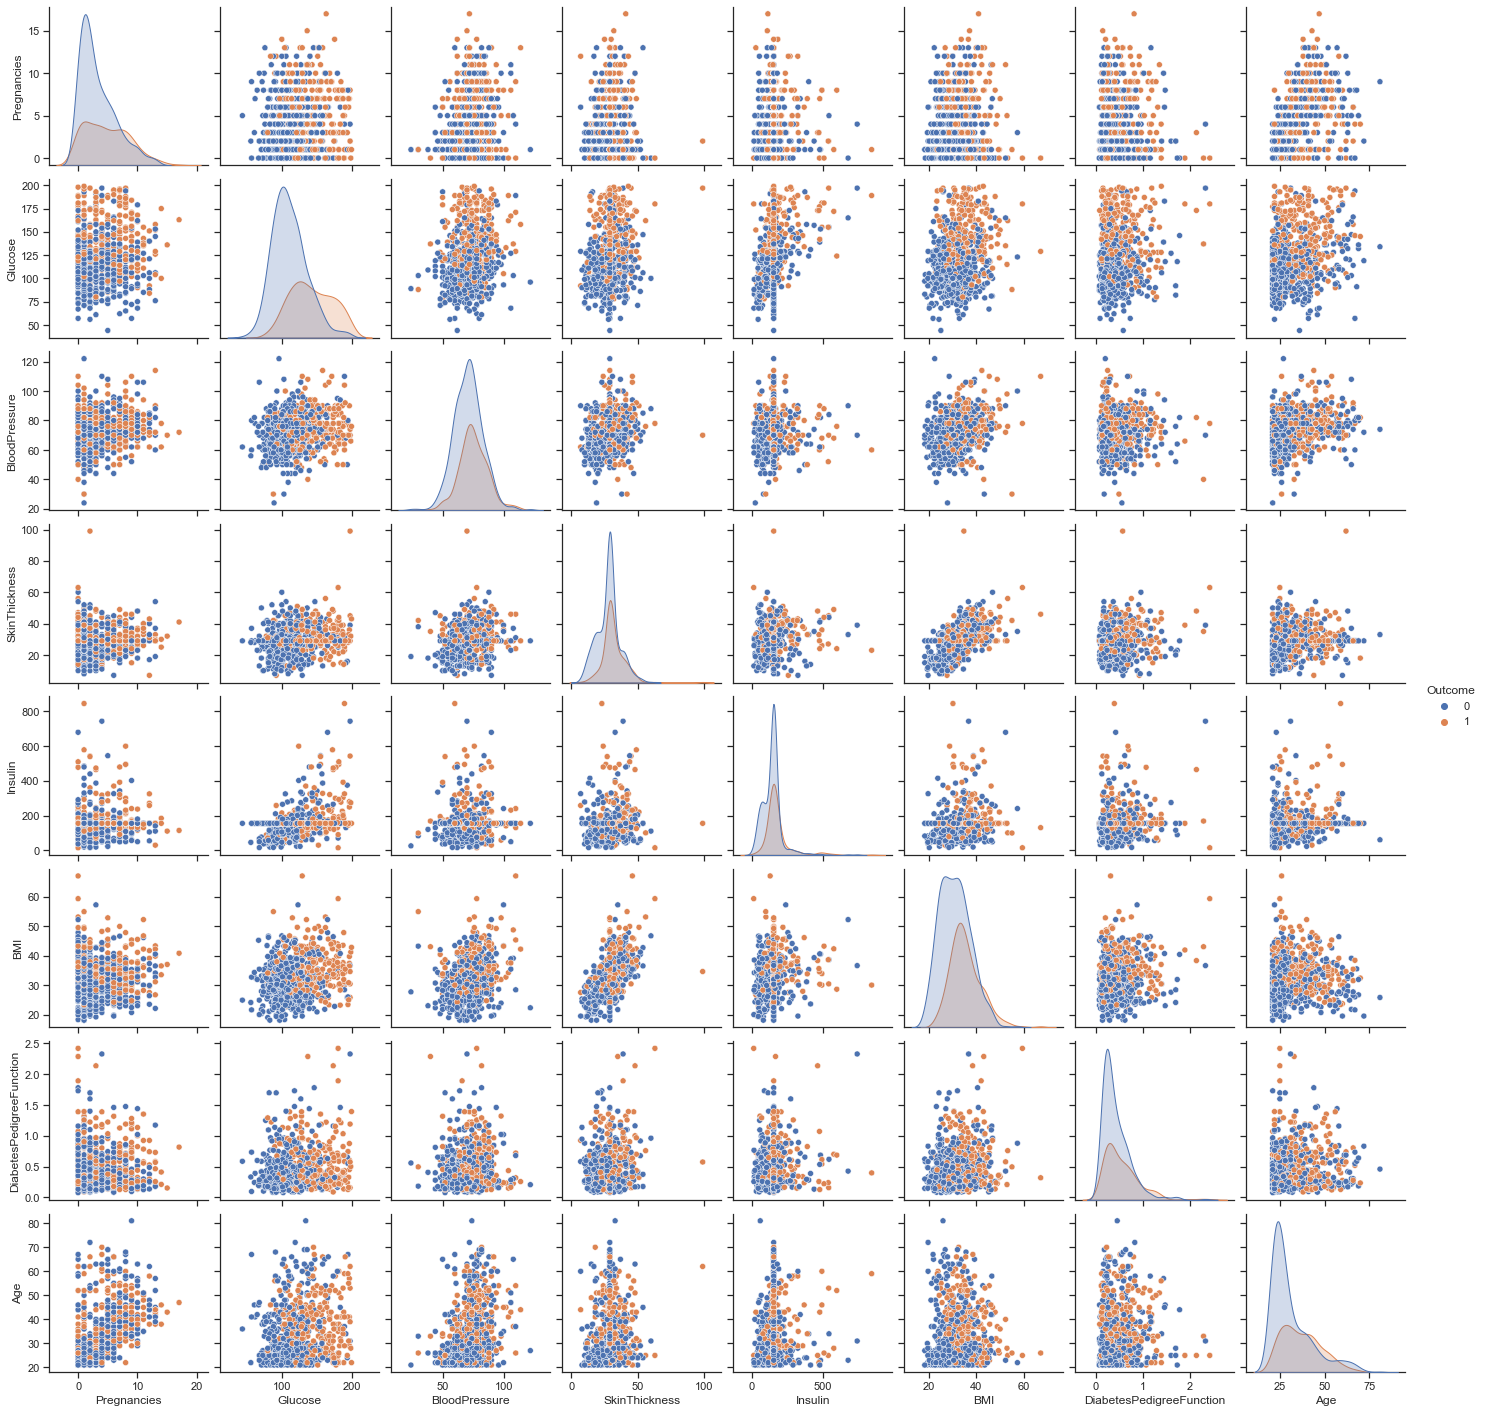

In [107]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Outcome")
plt.savefig('diabetes_pairplot.png')


In [6]:
model=SVC()
grid_values={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],
            "C":[.5,1,1.5]}
grid = GridSearchCV(model, grid_values, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'C': 0.5, 'kernel': 'poly'}


In [104]:
kernals=['linear', 'poly', 'rbf', 'sigmoid']
C=[.5,1,1.5]
result=[]

for each in kernals:
    for ea in C:
        model=SVC(C=ea, kernel=each)
        model.fit(X_train,y_train)
        y_predicted_test = model.predict(X_test)
        y_predicted_train=model.predict(X_train)
        train_score=model.score(X_train,y_train)
        test_score=model.score(X_test,y_test)
        f1_train=f1_score(y_train,y_predicted_train)
        f1_test=f1_score(y_test,y_predicted_test)
        temp=[each, ea, round(train_score,3),round(test_score,3),round(f1_train,3),round(f1_test,3)]
        result.append(temp)
df_results=pd.DataFrame(result,columns=["Kernal Type", "C", "Train Data Score", "Test Data Score", "Train f-score", "Test f-score"])
df_results    

,Kernal Type,C,Train Data Score,Test Data Score,Train f-score,Test f-score
0,linear,0.5,0.761,0.805,0.630,0.643
1,linear,1.0,0.762,0.799,0.631,0.627
2,linear,1.5,0.762,0.805,0.629,0.643
3,poly,0.5,0.757,0.779,0.580,0.564
4,poly,1.0,0.762,0.773,0.599,0.557
5,poly,1.5,0.767,0.786,0.608,0.582
6,rbf,0.5,0.749,0.786,0.588,0.593
7,rbf,1.0,0.754,0.792,0.593,0.600
8,rbf,1.5,0.761,0.792,0.602,0.600
9,sigmoid,0.5,0.409,0.429,0.052,0.043


In [73]:
kernals=['linear', 'poly', 'rbf', 'sigmoid']
result=[]

for each in kernals:
    model=SVC(kernel=each)
    model.fit(X_train,y_train)
    y_predicted_test = model.predict(X_test)
    y_predicted_train=model.predict(X_train)
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    f1_train=f1_score(y_train,y_predicted_train)
    f1_test=f1_score(y_test,y_predicted_test)
    temp=[each, round(train_score,3),round(test_score,3),round(f1_train,3),round(f1_test,3)]
    result.append(temp)
df_results=pd.DataFrame(result,columns=["Kernal Type", "Train Data Score", "Test Data Score", "Train f-score", "Test f-score"])
df_results  

,Kernal Type,Train Data Score,Test Data Score,Train f-score,Test f-score
0,linear,0.762,0.799,0.631,0.627
1,poly,0.762,0.773,0.599,0.557
2,rbf,0.754,0.792,0.593,0.600
3,sigmoid,0.376,0.377,0.082,0.059


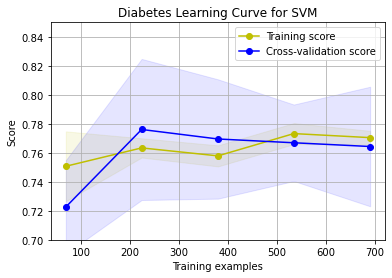

In [9]:
model=SVC(C=1.5, kernel='linear')
title="Diabetes Learning Curve for SVM"
trainingSizes,trainingScores,testingScores = learning_curve(model,X,y,random_state = 3,cv = 10)
plt.figure()
plt.title(title)
ylim = (0.7, .85)
if ylim is not None:
    plt.ylim(*ylim)
        
plt.xlabel("Training examples")
plt.ylabel("Score")
    
trainingScores_std = np.std(trainingScores, axis=1)
trainingScores_mean = np.mean(trainingScores, axis=1)
testingScores_mean = np.mean(testingScores, axis=1)
testingScores_std = np.std(testingScores, axis=1)
plt.grid()

plt.fill_between(trainingSizes, trainingScores_mean - trainingScores_std,
                trainingScores_mean + trainingScores_std, alpha=0.1,
                color="y")
plt.fill_between(trainingSizes, testingScores_mean - testingScores_std,
                testingScores_mean + testingScores_std, alpha=0.1, color="b")
plt.plot(trainingSizes, trainingScores_mean, 'o-', color="y",
        label="Training score")
plt.plot(trainingSizes, testingScores_mean, 'o-', color="b",
        label="Cross-validation score")

plt.legend(loc="best")
plt.show()